In [23]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Params
num_epochs = 50000
num_features  = 10

###  Load Diabetes dataset

In [25]:
from sklearn.datasets import load_diabetes
# from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()

diabetes_data = diabetes.data[:,:num_features]
# diabetes_data = normalize(diabetes_data)
diabetes_target = diabetes.target.reshape([diabetes.target.shape[0], 1])

x_train, x_test, y_train, y_test = train_test_split(diabetes_data, diabetes_target, train_size=0.8, random_state=1)

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(353, 10)
(353, 1)
(89, 10)
(89, 1)


###  Linear Regression Model

In [27]:
x = tf.placeholder(tf.float32, shape=[None, num_features])
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([num_features, 1]))
b = tf.Variable(tf.random_normal([1]))

In [28]:
y_prediction = tf.matmul(x, W) + b

In [29]:
loss = tf.reduce_mean(tf.square(y - y_prediction))
optimizer = tf.train.GradientDescentOptimizer(.05).minimize(loss)

In [30]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(num_epochs):
    sess.run(optimizer, feed_dict={x: x_train, y: y_train})
    if ((i+1)%5000==0 or (i+1)<10):
        print("Iteration %s: loss = %s" % (i+1, loss.eval(feed_dict={x: x_train, y: y_train})))

Iteration 1: loss = 25034.3
Iteration 2: loss = 21424.1
Iteration 3: loss = 18499.0
Iteration 4: loss = 16129.0
Iteration 5: loss = 14208.5
Iteration 6: loss = 12652.0
Iteration 7: loss = 11390.6
Iteration 8: loss = 10368.0
Iteration 9: loss = 9538.96
Iteration 5000: loss = 2976.01
Iteration 10000: loss = 2865.17
Iteration 15000: loss = 2850.47
Iteration 20000: loss = 2847.73
Iteration 25000: loss = 2846.88
Iteration 30000: loss = 2846.41
Iteration 35000: loss = 2846.06
Iteration 40000: loss = 2845.74
Iteration 45000: loss = 2845.46
Iteration 50000: loss = 2845.19


In [31]:
print("Weight: \n%s"% sess.run(W).T)
print("Bias: \n%s"% sess.run(b).T)

Weight: 
[[ -30.72243881 -269.86355591  536.0958252   325.15301514  -80.06933594
   -75.07720947 -236.65757751  102.434021    469.65005493   64.01979065]]
Bias: 
[ 151.35310364]


In [32]:
prediction_differences = np.absolute(sess.run(y_prediction, feed_dict={x: x_test}) - y_test)

In [33]:
print("Diabetes value are off by average %s." % np.mean(prediction_differences))

Diabetes value are off by average 42.0718398362.


### Data Visualization

In [34]:
prediction_differences = sess.run(y_prediction, feed_dict={x: x_test}) - y_test

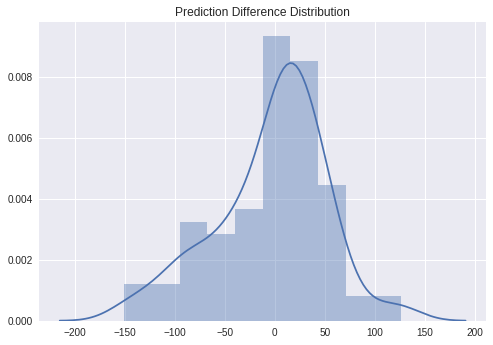

In [35]:
sns.distplot(prediction_differences)
plt.title("Prediction Difference Distribution")
plt.show()